CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

**Model**

- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

**Transmission**

- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears


**Fuel type**

- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas
- Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)
CO2 Emissions

Target: the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

ACKNOWLEDGEMENTS
The data has been taken and compiled from the below Canada Government official link
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [461]:
# remove black frames from plots
sns.despine(trim=True, right=True)

# Set style to 'darkgrid'
sns.set(style="darkgrid")

# Clear Matplotlib cache and save the plot in high resolution 
plt.rcParams.update({'figure.dpi': 300})
plt.savefig('output_figure.png')

<Figure size 1920x1440 with 0 Axes>

In [225]:
df = pd.read_csv('./data/co2_emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [471]:
# Get column names and number of unique values in each column
column_names = df.columns
unique_value_counts = [df[column].nunique() for column in df.columns]
unique_value_counts

[42, 2053, 16, 51, 8, 27, 5, 211, 143, 181, 54, 331]

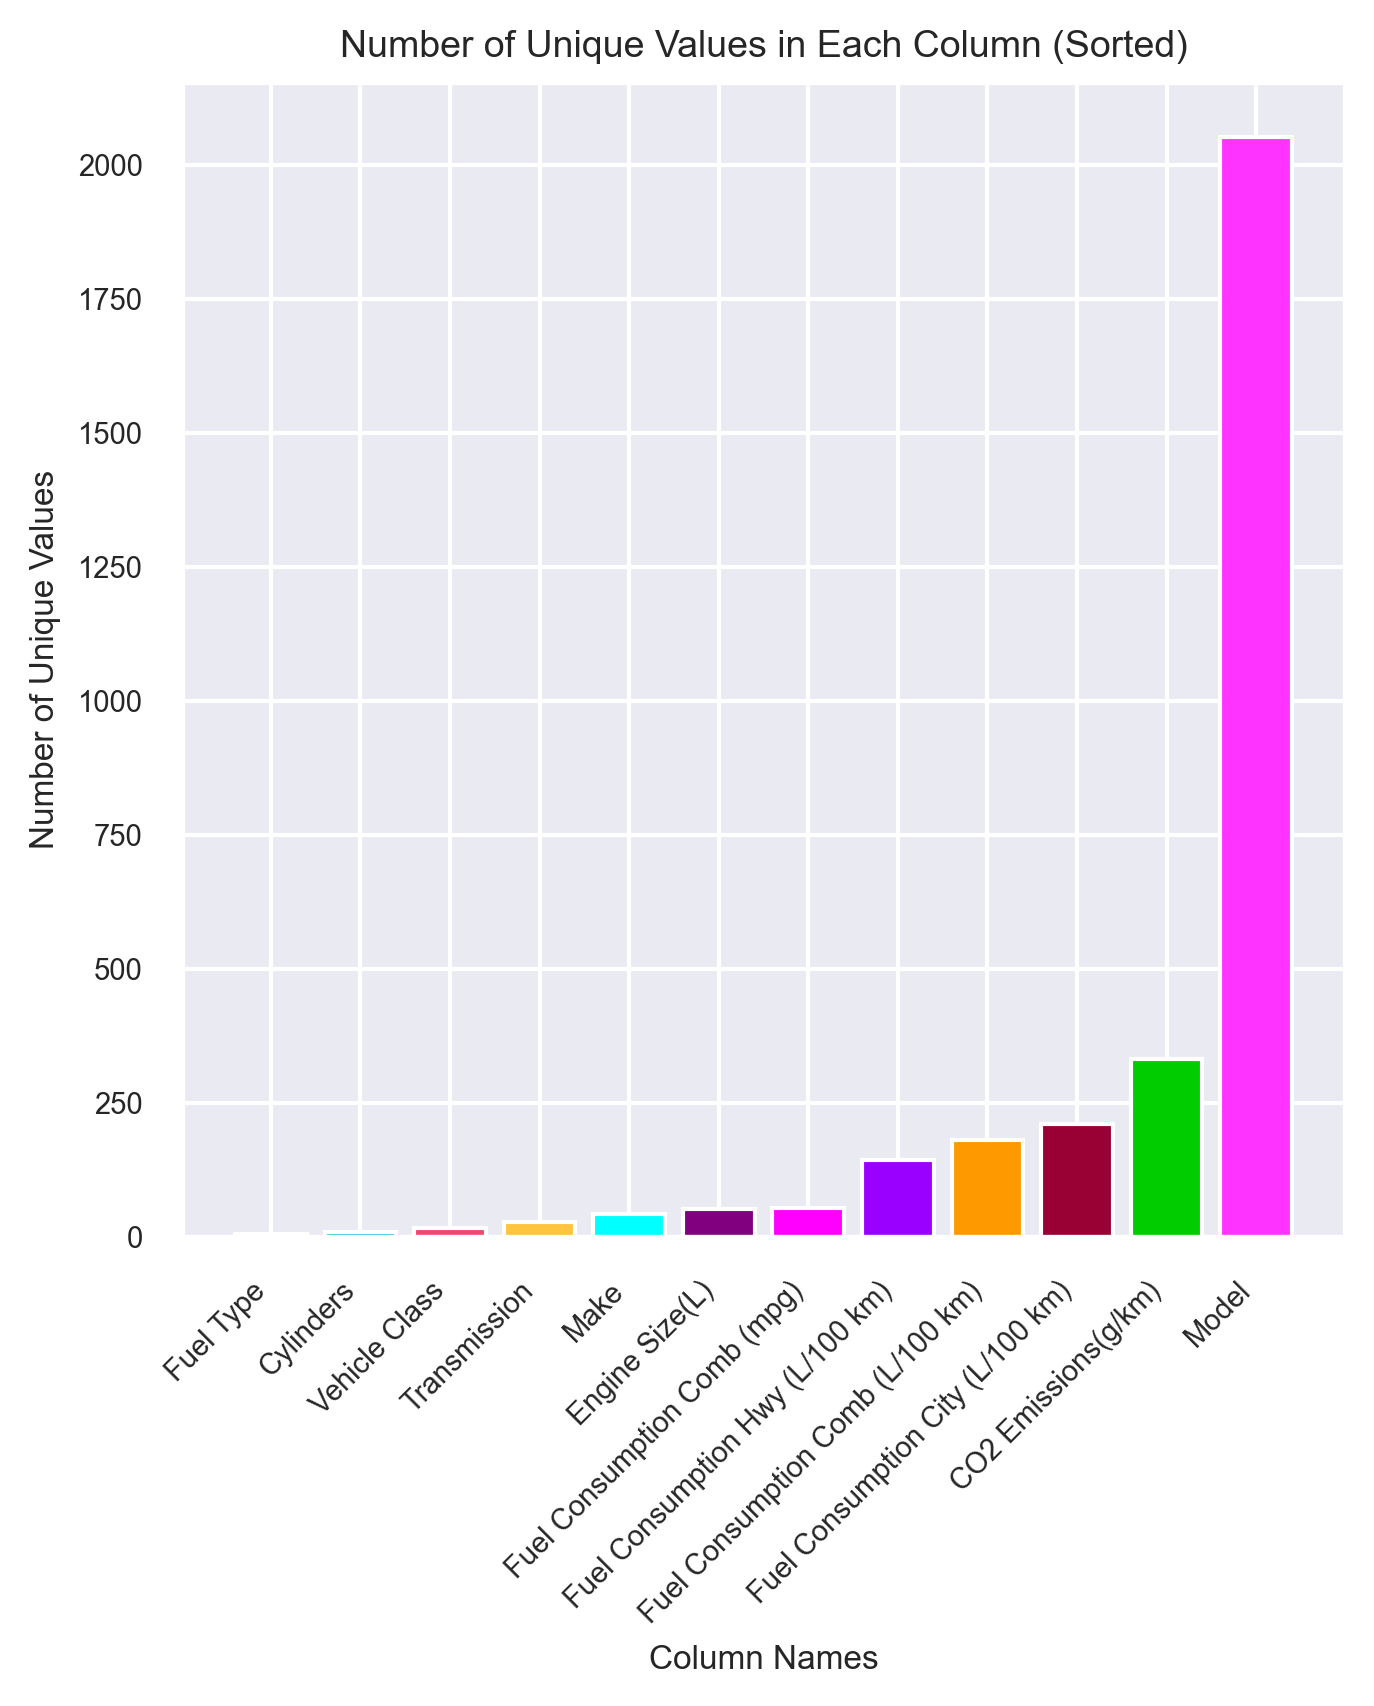

In [479]:
# Sort the values in ascending order
sorted_columns, sorted_counts = zip(*sorted(zip(column_names, unique_value_counts), key=lambda x: x[1]))

# Define custom colors for the bars (change colors as needed)
custom_colors = ['#B0DD3E', '#21BCD1', '#EF476F', '#FFC43D', 'cyan',  'purple', 'magenta', '#9900FF', '#FF9900', '#990033', '#00CC00', '#FF33FF']

# Create a bar plot with custom colors
plt.figure(figsize=(5, 5))
bars = plt.bar(sorted_columns, sorted_counts, color=custom_colors)


plt.xlabel('Column Names', fontsize=8)
plt.ylabel('Number of Unique Values', fontsize=8)
plt.title('Number of Unique Values in Each Column (Sorted)', fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)

plt.show()

In [460]:
for column in df.columns:
    print(df[column].unique().size)

42
2053
16
51
8
27
5
211
143
181
54
331


In [450]:
df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [456]:
df['Model'].unique().size

2053

In [226]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Correlations

In [228]:
df[df['Fuel Type'] == 'X'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Fuel Consumption Comb (L/100 km),1.000000,0.999104
CO2 Emissions(g/km),0.999104,1.000000


In [229]:
df[df['Fuel Type'] == 'Z'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Fuel Consumption Comb (L/100 km),1.00000,0.99867
CO2 Emissions(g/km),0.99867,1.00000


In [230]:
df[df['Fuel Type'] == 'E'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Fuel Consumption Comb (L/100 km),1.000000,0.990724
CO2 Emissions(g/km),0.990724,1.000000


In [231]:
df[df['Fuel Type'] == 'N'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Fuel Consumption Comb (L/100 km),NaN,NaN
CO2 Emissions(g/km),NaN,NaN


In [246]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [252]:
selected_columns = df[['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)']]
selected_columns.corr()

,Fuel Consumption Comb (L/100 km),Engine Size(L),Cylinders,CO2 Emissions(g/km)
Fuel Consumption Comb (L/100 km),1.000000,0.817060,0.780534,0.918052
Engine Size(L),0.817060,1.000000,0.927653,0.851145
Cylinders,0.780534,0.927653,1.000000,0.832644
CO2 Emissions(g/km),0.918052,0.851145,0.832644,1.000000


<Axes: title={'center': 'Correlation Heatmap'}>

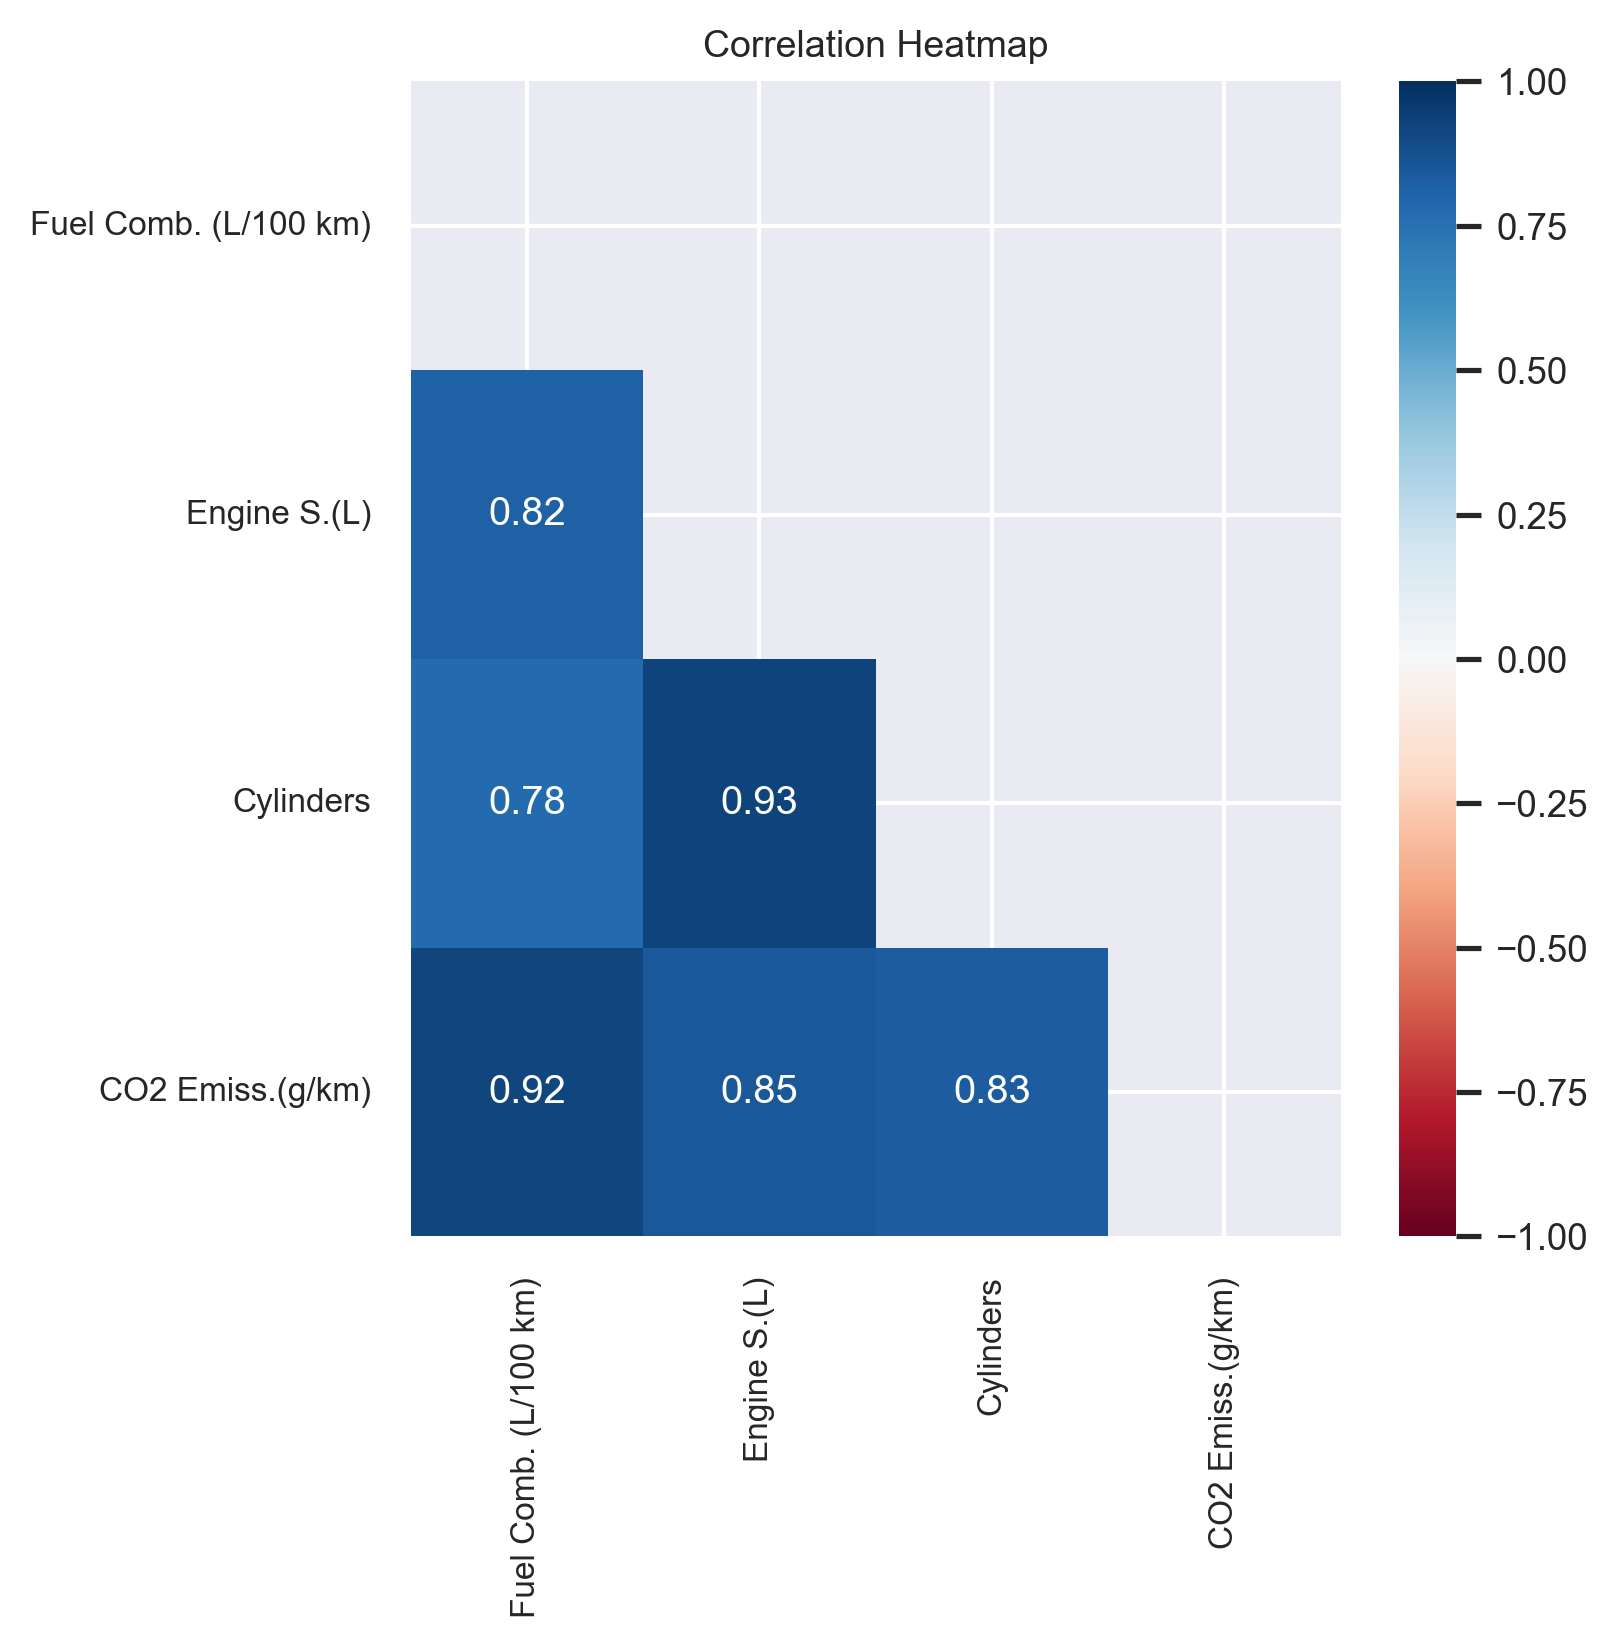

In [264]:
def visualise_heatmap(dataset_corr, corr_objects, cmap, x_tick_labels, y_tick_labels):
    # Prepare figure
    plt.figure(figsize=(5, 5))

    # Draw heatmap as triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
    
    # Add descriptions
    plt.title(corr_objects, fontsize=9)

    # Plot heatmap
    sns.set(font_scale=0.8)  # Adjust the font scale for the tick labels
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask)

    # Rename x-axis and y-axis ticks
    heatmap.set_xticklabels(x_tick_labels, fontsize=8)
    heatmap.set_yticklabels(y_tick_labels, fontsize=8)

    return heatmap

# Example usage:
x_tick_labels = ['Fuel Comb. (L/100 km)', 'Engine S.(L)', 'Cylinders', 'CO2 Emiss.(g/km)']  # Replace with your desired x-axis labels
y_tick_labels = ['Fuel Comb. (L/100 km)', 'Engine S.(L)', 'Cylinders', 'CO2 Emiss.(g/km)']  # Replace with your desired y-axis labels
visualise_heatmap(selected_columns.corr(), "Correlation Heatmap", cmap='RdBu', x_tick_labels=x_tick_labels, y_tick_labels=y_tick_labels)


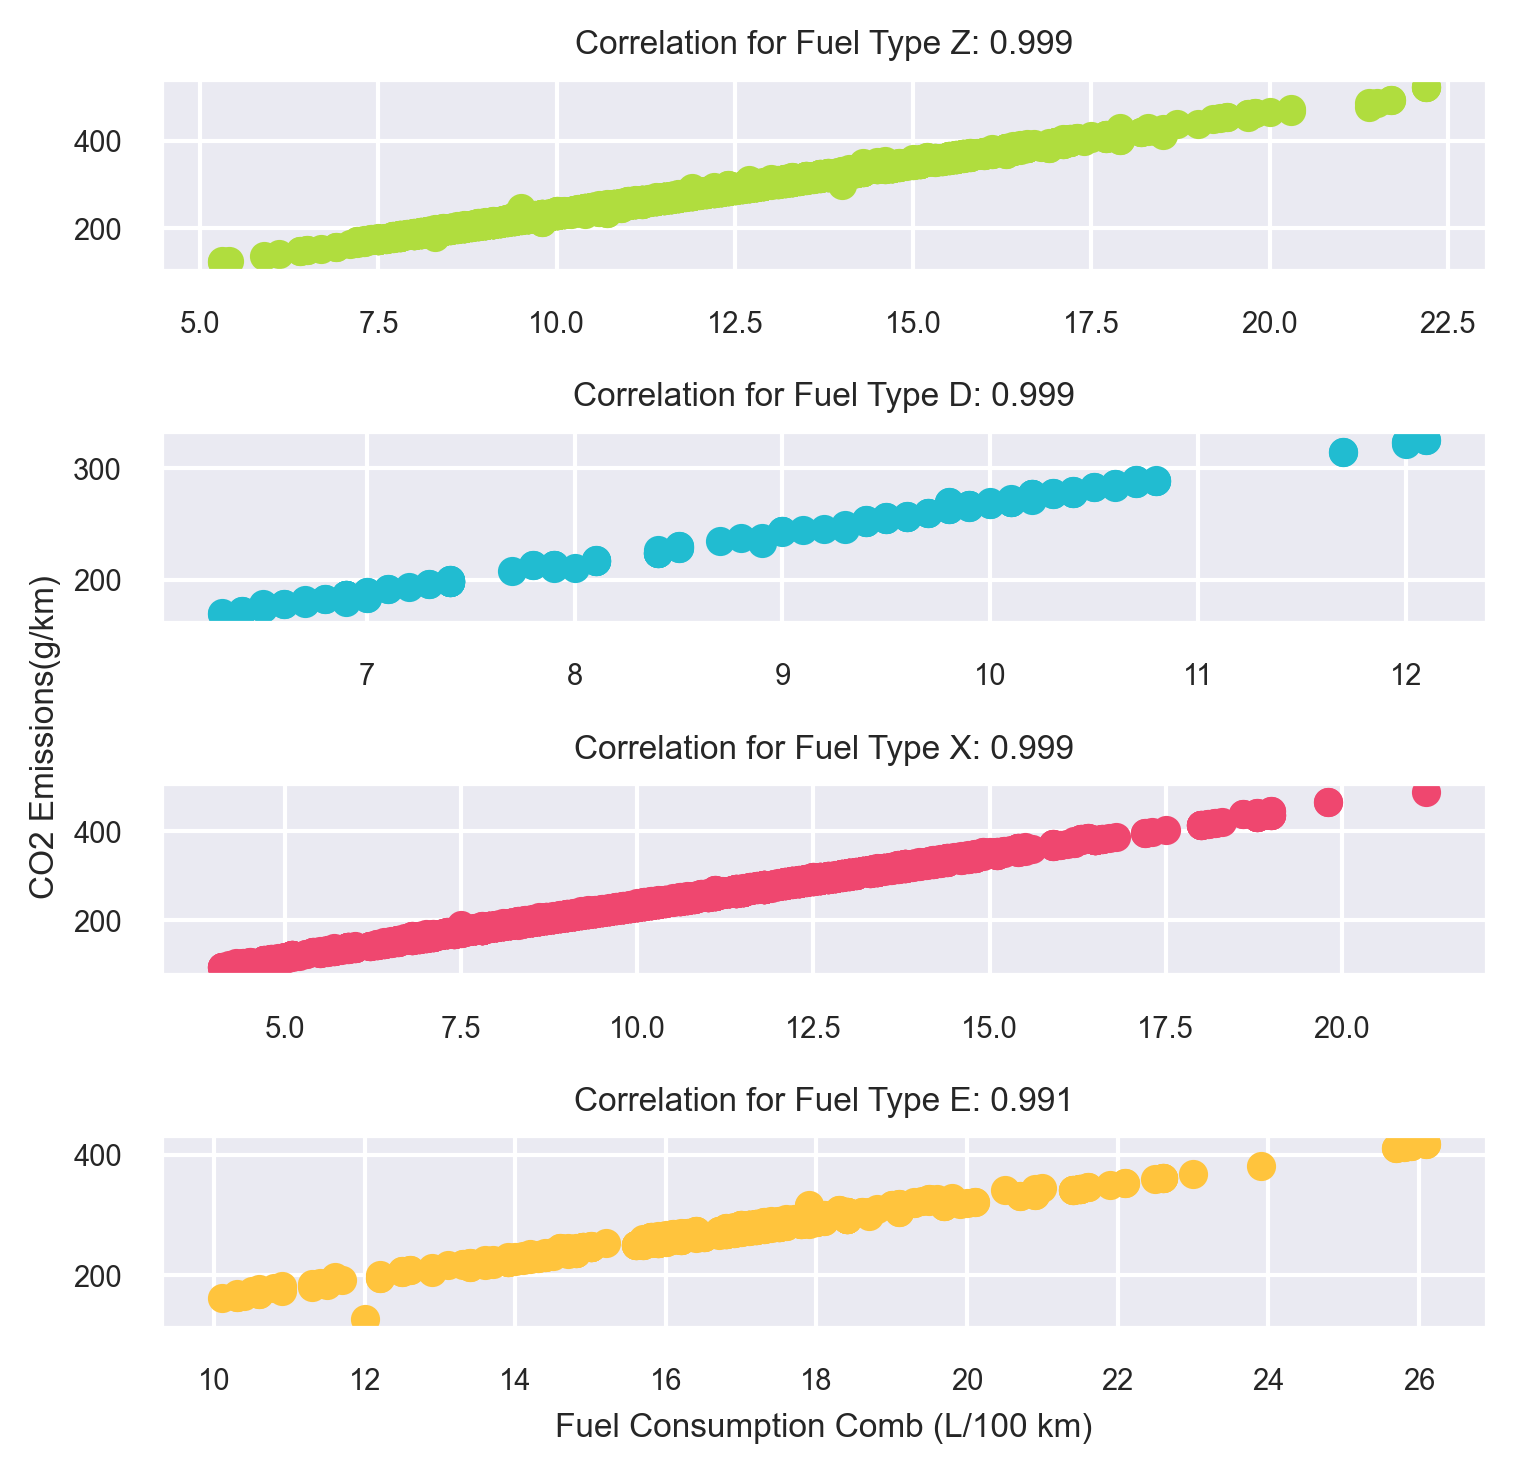

In [265]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(5, 5))

# List of unique fuel types
fuel_types = df[df['Fuel Type'] != 'N']['Fuel Type'].unique()

# Adjust the left margin (add empty space)
fig.subplots_adjust(left=0.5)

# Define a list of colors for the scatter plots
colors = ['#B0DD3E', '#21BCD1', '#EF476F', '#FFC43D']

# Loop through fuel types and create scatter plots with different colors
for i, (fuel_type, color) in enumerate(zip(fuel_types, colors)):
    subset = df[df['Fuel Type'] == fuel_type]
    ax = axes[i]
    
    # Calculate correlation coefficient
    correlation = subset.corr(numeric_only=True).loc['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
    
    # Create scatter plot with specified color
    ax.scatter(subset['Fuel Consumption Comb (L/100 km)'], subset['CO2 Emissions(g/km)'], label=f'Fuel Type {fuel_type}', c=color)
    
    # Add title
    ax.set_title(f'Correlation for Fuel Type {fuel_type}: {correlation:.3f}', fontsize=8)
   
    # Remove y-labels except for the first subplot
    if i != 0:
        ax.set_ylabel('')
    
    # Remove x-labels except for the last subplot
    if i != len(fuel_types) - 1:
        ax.set_xlabel('')

    # Adjust the font size of y ticks and x ticks
    ax.tick_params(axis='both', which='major', labelsize=7)

# Set common y-label with a margin on the left
fig.text(0.0001, 0.5, 'CO2 Emissions(g/km)', va='center', rotation='vertical', fontsize=8)
# Set common x-label
axes[-1].set_xlabel('Fuel Consumption Comb (L/100 km)', fontsize=8)

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




## Feature Selection

In [382]:
fuel_df = pd.get_dummies(df, columns=[ 'Make', 'Model', 'Vehicle Class', 'Fuel Type', 'Transmission'], dtype=float)
fuel_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.0,4,9.9,6.7,8.5,33,196,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,4,11.2,7.7,9.6,29,221,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.5,4,6.0,5.8,5.9,48,136,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,6,12.1,8.7,10.6,27,244,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7381,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7382,2.0,4,11.7,8.6,10.3,27,240,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7383,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
fuel_df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Make_ACURA',
       'Make_ALFA ROMEO', 'Make_ASTON MARTIN',
       ...
       'Transmission_AS8', 'Transmission_AS9', 'Transmission_AV',
       'Transmission_AV10', 'Transmission_AV6', 'Transmission_AV7',
       'Transmission_AV8', 'Transmission_M5', 'Transmission_M6',
       'Transmission_M7'],
      dtype='object', length=2150)

In [384]:
X = fuel_df.drop(columns=['CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)'])
y = fuel_df[['CO2 Emissions(g/km)']]
y = np.ravel(y)

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [386]:
X_train.shape

(5908, 2148)

In [387]:
X_test.shape

(1477, 2148)

In [362]:
y_train

array([231, 299, 273, ..., 242, 198, 279], dtype=int64)

In [363]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestRegressor(random_state=42)

# Fit the pipeline on your data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained Random Forest Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance score (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


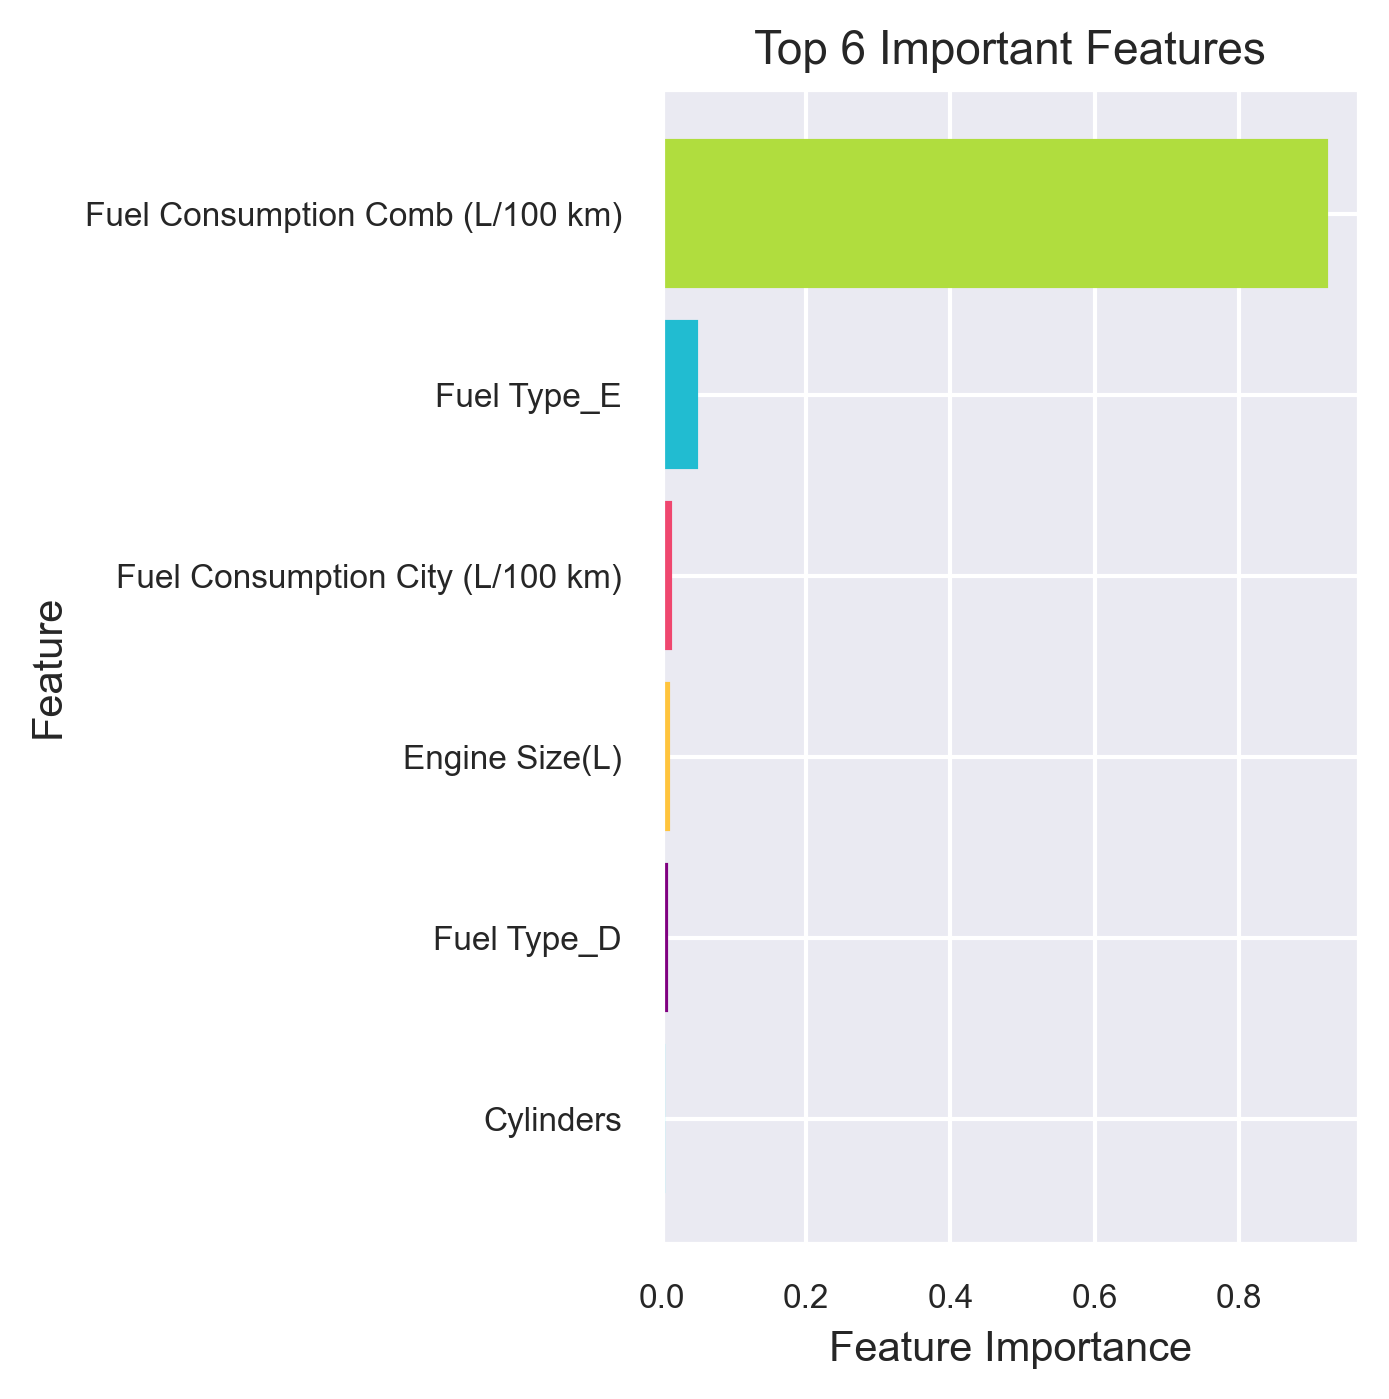

In [364]:
# Plot the top N important features
top_n = 6  # Change this value to plot more or fewer features
plt.figure(figsize=(3, 5))  # Adjust the figure size

# Create a list of different colors for bars
colors = ['#B0DD3E', '#21BCD1', '#EF476F', '#FFC43D', 'purple', 'cyan', 'magenta']

# Create the bar plot with different colors
bars = plt.barh(range(top_n), feature_importance_df["Importance"][:top_n], align="center")

# Set custom colors for each bar
for i, bar in enumerate(bars):
    bar.set_color(colors[i])

# Customize tick labels size
plt.yticks(range(top_n), feature_importance_df["Feature"][:top_n], fontsize=8)
plt.xticks(fontsize=8)

# Customize axis labels and title size
plt.xlabel("Feature Importance", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.title("Top {} Important Features".format(top_n), fontsize=11)

plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


## With Fuel Consumption

In [331]:
X = fuel_df[['Fuel Consumption Comb (L/100 km)', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']]

y = fuel_df[['CO2 Emissions(g/km)']]
y = np.ravel(y)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
X_train.shape

(5908, 5)

In [334]:
X_test.shape

(1477, 5)

In [335]:
from sklearn.metrics import mean_squared_error

classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

scaler = StandardScaler()

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring='r2')
    grid.fit(X_train, y_train)

    print(f'Train score for {classifier}: {grid.best_score_}')
    print()

Train score for LinearRegression(): 0.9911958165254406

Train score for DecisionTreeRegressor(): 0.9972423196872761

Train score for RandomForestRegressor(): 0.9970371034530153

Train score for KNeighborsRegressor(): 0.9967938228866245



In [336]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_scorer(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return -rmse  # Note the negative sign; GridSearchCV tries to maximize the scoring function

# Create the RMSE scorer
rmse_scorer = make_scorer(rmse_scorer)


In [337]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [3, 4],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor)

grid_rf = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring={'r2': 'r2', 'rmse': rmse_scorer},
    refit='r2'  # Specify 'r2' as the metric for refitting
)

grid_rf.fit(X_train, y_train)

print('Best R-squared score:', grid_rf.best_score_)
print('Best params:', grid_rf.best_params_)

# Access RMSE from the grid search results
rmse_scores = np.sqrt(-grid_rf.cv_results_['mean_test_rmse'])  # Note the negative sign
best_rmse_idx = np.argmin(rmse_scores)
print('Best RMSE score:', rmse_scores[best_rmse_idx])
print('Best RMSE params:', grid_rf.cv_results_['params'][best_rmse_idx])



Best R-squared score: 0.9948994279496659
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 90}
Best RMSE score: 2.0350202951450154
Best RMSE params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 90}


The RMSE (Root Mean Squared Error) is a commonly used metric for evaluating the performance of regression models. It measures the average magnitude of the errors between the predicted values and the actual values. Specifically, the RMSE is calculated as follows:

Calculate the squared difference between each predicted value and its corresponding actual value.
Take the mean (average) of these squared differences.
Finally, take the square root of the mean to obtain the RMSE.

In your case, you have obtained an RMSE score of approximately 2.053. Here's how to interpret this:

The RMSE value represents the average absolute error between the predicted CO2 emissions and the actual CO2 emissions.
Lower RMSE values indicate better model performance, as they suggest that the model's predictions are closer to the actual values on average.
An RMSE of 2.053 suggests that, on average, your model's predictions for CO2 emissions are off by approximately 2.053 grams per kilometer.
You can think of it as a measure of how well your model's predictions align with the actual data. In this context, an RMSE of 2.053 may be considered quite good, but the interpretation depends on the specific domain and context of your regression problem.

The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable (in your case, CO2 emissions) that is explained by the independent variables (features) in your regression model. It is a value between 0 and 1, where:

R2 = 0: The model does not explain any of the variance in the dependent variable, indicating a poor fit.
R2 = 1: The model explains all of the variance in the dependent variable, indicating a perfect fit.

In your case, you have obtained an R-squared score of approximately 0.995. Here's how to interpret this score:

An R2 score of 0.995 is very close to 1, which suggests that your regression model is an excellent fit for the data.
It indicates that about 99.5% of the variance in CO2 emissions can be explained by the features (independent variables) included in your model.
In practical terms, this means that your model is highly effective at predicting CO2 emissions based on the selected features.

In [338]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [3, 4 ],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor)

grid_rf = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring='r2'  # Use an appropriate scoring metric for regression, like 'r2' for coefficient of determination
)

grid_rf.fit(X_train, y_train)

print('Best score:', grid_rf.best_score_)
print('Best params:', grid_rf.best_params_)

Best score: 0.994915604868531
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 100}


### Test R2

In [339]:
score = grid_rf.score(X_test, y_test)
params = grid_rf.best_params_

print(f"Score for R2: {score}")
print(f"With parameters {params}\n")

Score for R2: 0.9940892646106089
With parameters {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 100}



### Test RMSE

In [340]:

# Make predictions on the test set
y_test_pred = grid_rf.predict(X_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for Test Set:', rmse_test)

RMSE for Test Set: 4.508960798831964


In [341]:
y_test_pred

array([253.7399781 , 341.49887843, 324.53625684, ..., 181.71033279,
       237.42164969, 191.86472137])

In [342]:
X_test['co2_pred'] = y_test_pred

In [343]:
X_test[:20].index

Index([7261, 4489, 1539, 3532, 6418, 3703, 5976, 4332, 5015, 2087, 2126, 4161,
       4814,  486, 6607, 1128, 5159, 5391, 6643, 6003],
      dtype='int64')

In [344]:
y_test_pred[:20]

array([253.7399781 , 341.49887843, 324.53625684, 296.40718043,
       309.6204785 , 401.31926759, 241.6281315 , 216.83280666,
       244.92285147, 225.67930052, 286.74184604, 322.25240226,
       275.45118897, 254.38454402, 321.78982705, 386.36286042,
       246.34078766, 193.38506932, 203.25457072, 210.27726181])

In [345]:
df.iloc[[7261, 4489, 1539, 3532, 6418, 3703, 5976, 4332, 5015, 2087, 2126, 4161,
       4814,  486, 6607, 1128, 5159, 5391, 6643, 6003]]['CO2 Emissions(g/km)']

7261    253
4489    344
1539    322
3532    297
6418    308
3703    406
5976    242
4332    216
5015    246
2087    223
2126    283
4161    326
4814    274
486     251
6607    322
1128    382
5159    248
5391    193
6643    204
6003    211
Name: CO2 Emissions(g/km), dtype: int64

## Without Fuel Consumption

In [388]:
all_cats_df = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype=float)
all_cats_df.shape

(7385, 2150)

In [389]:
X = all_cats_df.drop(columns=['CO2 Emissions(g/km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)'])

y = all_cats_df['CO2 Emissions(g/km)']

In [390]:
X.shape

(7385, 2145)

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [392]:
X_train.shape

(5908, 2145)

In [393]:
X_test.shape

(1477, 2145)

In [394]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestRegressor(random_state=42)

# Fit the pipeline on your data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained Random Forest Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance score (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

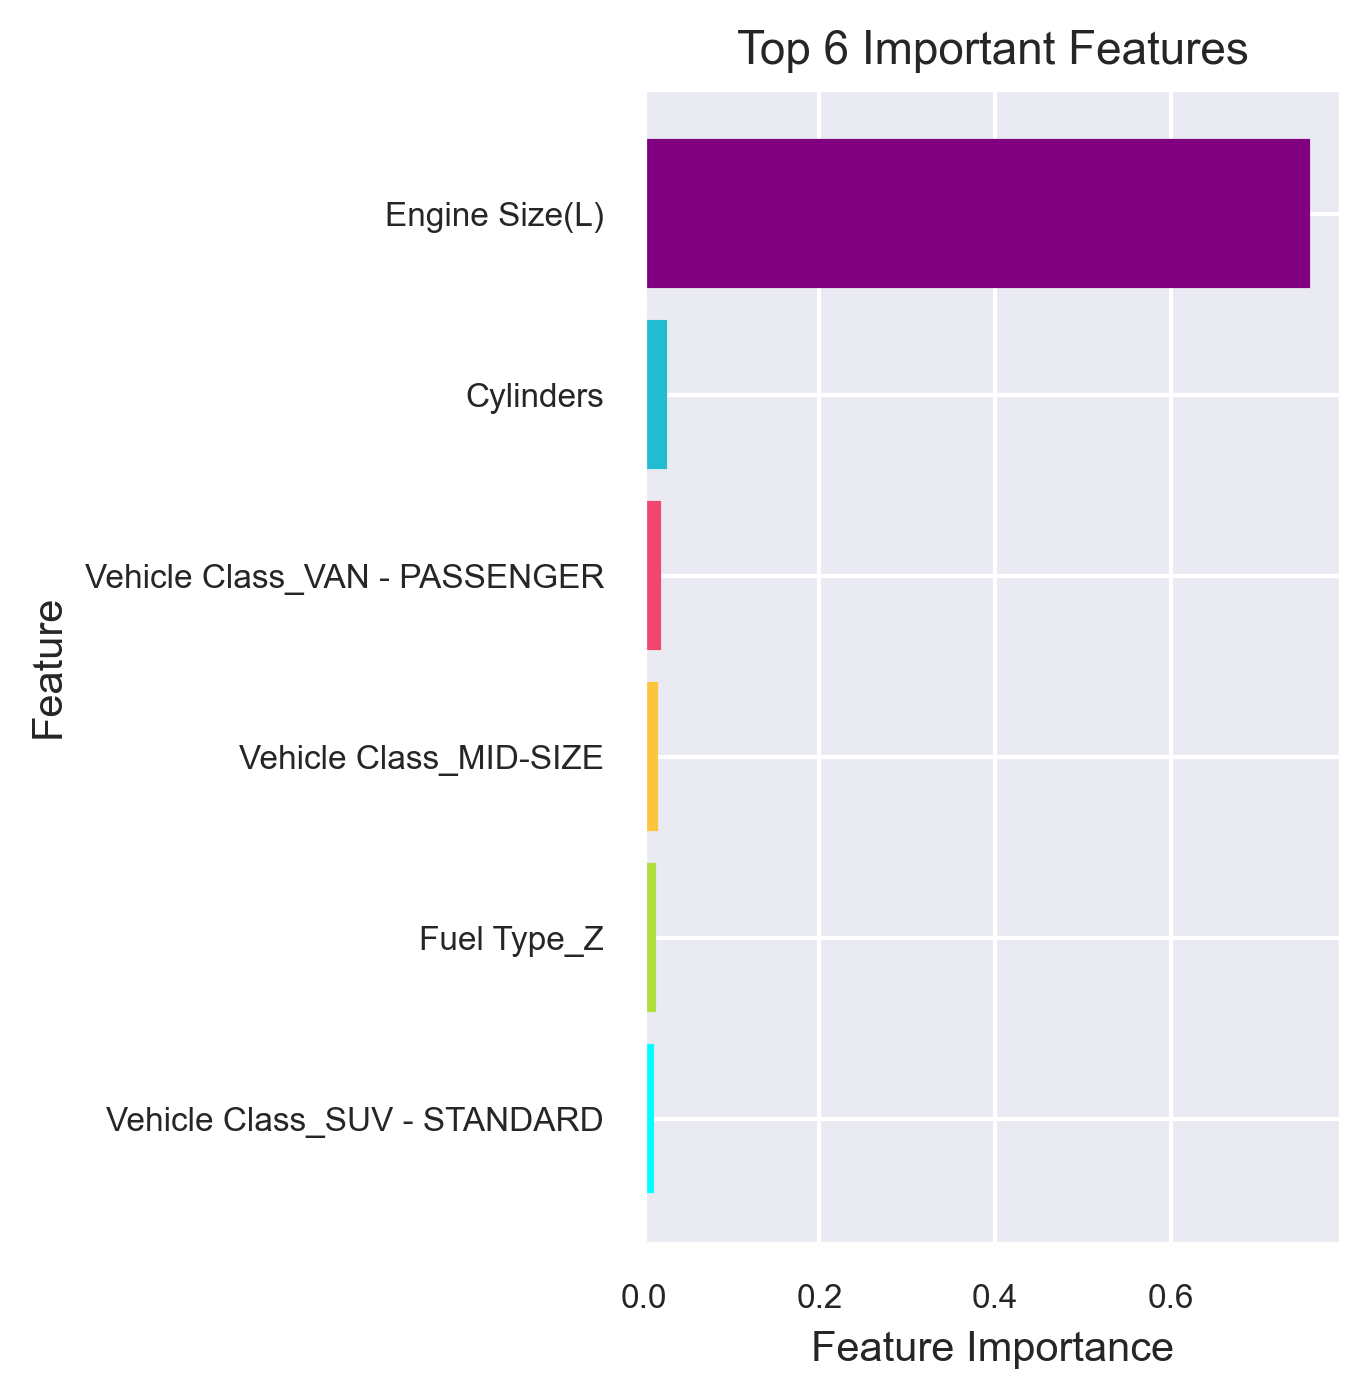

In [395]:
# Plot the top N important features
top_n = 6  # Change this value to plot more or fewer features
plt.figure(figsize=(3, 5))  # Adjust the figure size

# Create a list of different colors for bars
colors = [ 'purple', '#21BCD1', '#EF476F', '#FFC43D', '#B0DD3E', 'cyan', 'magenta']

# Create the bar plot with different colors
bars = plt.barh(range(top_n), feature_importance_df["Importance"][:top_n], align="center")

# Set custom colors for each bar
for i, bar in enumerate(bars):
    bar.set_color(colors[i])

# Customize tick labels size
plt.yticks(range(top_n), feature_importance_df["Feature"][:top_n], fontsize=8)
plt.xticks(fontsize=8)

# Customize axis labels and title size
plt.xlabel("Feature Importance", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.title("Top {} Important Features".format(top_n), fontsize=11)

plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


In [408]:
list(feature_importance_df["Feature"][:top_n])

['Engine Size(L)',
 'Cylinders',
 'Vehicle Class_VAN - PASSENGER',
 'Vehicle Class_MID-SIZE',
 'Fuel Type_Z',
 'Vehicle Class_SUV - STANDARD']

In [401]:
all_cats_df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Make_ACURA',
       'Make_ALFA ROMEO', 'Make_ASTON MARTIN',
       ...
       'Transmission_AV7', 'Transmission_AV8', 'Transmission_M5',
       'Transmission_M6', 'Transmission_M7', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object', length=2150)

In [405]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [409]:
X = all_cats_df[['Engine Size(L)',
                'Cylinders',
                'Vehicle Class_VAN - PASSENGER',
                'Vehicle Class_MID-SIZE',
                'Fuel Type_Z',
                'Vehicle Class_SUV - STANDARD'
                ]]

y = all_cats_df['CO2 Emissions(g/km)']

In [410]:
for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring='r2')
    grid.fit(X_train, y_train)

    print(f'Train score for {classifier}: {grid.best_score_}')
    print()

Train score for LinearRegression(): -1.7657170379548785e+25

Train score for DecisionTreeRegressor(): 0.9547172231514891

Train score for RandomForestRegressor(): 0.9607738026248785

Train score for KNeighborsRegressor(): 0.5377558273332064



In [411]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [2, 3, 4],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor2 = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor2)

grid_rf2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring={'r2': 'r2', 'rmse': rmse_scorer},
    refit='r2'  # Specify 'r2' as the metric for refitting
)

grid_rf2.fit(X_train, y_train)

print('Best R-squared score:', grid_rf2.best_score_)
print('Best params:', grid_rf2.best_params_)

# Access RMSE from the grid search results
rmse_scores = np.sqrt(-grid_rf2.cv_results_['mean_test_rmse'])  # Note the negative sign
best_rmse_idx = np.argmin(rmse_scores)
print('Best RMSE score:', rmse_scores[best_rmse_idx])
print('Best RMSE params:', grid_rf2.cv_results_['params'][best_rmse_idx])

Best R-squared score: 0.9544710651061287
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 100}
Best RMSE score: 3.530199821886431
Best RMSE params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 100}


In [412]:
score = grid_rf2.score(X_test, y_test)
params = grid_rf2.best_params_

print(f"Score for R2: {score}")
print(f"With parameters {params}\n")

Score for R2: 0.9593523127449868
With parameters {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 100}



In [414]:

# Make predictions on the test set
y_test_pred = grid_rf2.predict(X_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for Test Set:', rmse_test)

RMSE for Test Set: 11.824250480251607


## Cat Boost with Model Column

CatBoost is capable of handling categorical variables without requiring explicit one-hot encoding. CatBoost is a gradient boosting algorithm that can naturally handle categorical features through an internal technique called "ordered boosting" or "ordered categorical encoding."

Here's how CatBoost works with categorical features:

Categorical Variable Handling: CatBoost can directly take categorical features as input without the need to one-hot encode them. You can specify which features are categorical, and CatBoost will internally handle the encoding.

CatBoost Encoding: CatBoost uses a technique known as "ordered boosting" for categorical encoding. It sorts the categories within each feature by the target variable's mean, and then it encodes them accordingly. This means that the encoding is data-driven and optimized for the specific dataset.

Efficient Training: CatBoost optimizes the training process to work efficiently with categorical features. It avoids the need for large memory usage that can occur with one-hot encoding.

Automatic Feature Importance: CatBoost can provide feature importance scores, including those for categorical features, which can be useful for understanding the impact of different features on the model's predictions.

Because of these capabilities, CatBoost is a powerful choice for working with datasets that contain a mix of categorical and numerical features. It can effectively model relationships between these features and make accurate predictions without extensive preprocessing.

However, it's essential to specify which features are categorical when training a CatBoost model by using the cat_features parameter, and CatBoost will handle the rest.

In [ ]:
df.columns

In [419]:
df_no_fuel = df.drop(columns=['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'])

In [420]:
df_no_fuel.Model.value_counts()[:200]

Model
F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
                 ..
SPORTAGE          8
MKX AWD           8
Mustang           8
A8                8
MAZDA5            8
Name: count, Length: 200, dtype: int64

In [421]:
df_no_fuel.corr(numeric_only=True)

,Engine Size(L),Cylinders,CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.851145
Cylinders,0.927653,1.000000,0.832644
CO2 Emissions(g/km),0.851145,0.832644,1.000000


In [422]:
# Import necessary libraries
import catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

## With Model
3 (iterations) * 3 (learning rates) * 3 (depths) = 27 different models.

In [430]:
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_no_fuel, columns=categorical_features)

In [480]:


# Select features (independent variables) and the target variable
X = df_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Features
y = df_encoded['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [481]:
X_train.shape

(5908, 2145)

In [426]:


# Define a grid of hyperparameters to search
param_grid_catboost = {
    'iterations': [1000, 1500, 2000],  # Number of boosting iterations
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'depth': [6, 8, 10],  # Depth of the trees
}

# Initialize the CatBoost Regressor
catboost_model_with_model = CatBoostRegressor(loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   random_seed=42,  # Random seed for reproducibility
                                   verbose=False,
                                   )

# Initialize the Grid Search with cross-validation
grid_search_result = catboost_model_with_model.grid_search(param_grid_catboost, X=X_train, y=y_train,
                                                            cv=5, plot=True,
                                                search_by_train_test_split=False,
                                                            )

# Get the best hyperparameters from the Grid Search
best_params = grid_search_result['params']
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_test_pred = catboost_model_with_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_test_pred)
print("R2:", r2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 14.26196435
bestIteration = 999

Training on fold [1/5]

bestTest = 13.38968918
bestIteration = 999

Training on fold [2/5]

bestTest = 13.18592803
bestIteration = 999

Training on fold [3/5]

bestTest = 12.9292918
bestIteration = 999

Training on fold [4/5]

bestTest = 14.02836488
bestIteration = 999

0:	loss: 13.5590476	best: 13.5590476 (0)	total: 47.6s	remaining: 20m 37s
Training on fold [0/5]

bestTest = 15.75542412
bestIteration = 999

Training on fold [1/5]


KeyboardInterrupt: 

## Without Model

In [482]:
categorical_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

df_encoded = pd.get_dummies(df_no_fuel.drop(columns=['Model']), columns=categorical_features)

# Select features (independent variables) and the target variable
X = df_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Features
y = df_encoded['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [483]:
X_train.shape

(5908, 92)

In [ ]:


# Define a grid of hyperparameters to search
param_grid_catboost = {
    'iterations': [1000, 1500, 2000],  # Number of boosting iterations
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'depth': [6, 8, 10],  # Depth of the trees
}

# Initialize the CatBoost Regressor
catboost_model_no_model = CatBoostRegressor(loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   random_seed=42, # Random seed for reproducibility
                                   verbose=False,
                                   )

# Initialize the Grid Search with cross-validation
grid_search_result2 = catboost_model_no_model.grid_search(param_grid_catboost, X=X_train, y=y_train,
                           #scoring='neg_mean_squared_error',  # Use negative RMSE as the scoring metric
                           cv=5,  # Number of cross-validation folds
                           plot=True,
                           search_by_train_test_split=False,
                           )

# Get the best hyperparameters from the Grid Search
best_params = grid_search_result2['params']
print("Best Hyperparameters:", best_params)

# Get the best CatBoost model from the Grid Search

# Make predictions on the test set using the best model
y_test_pred2 = catboost_model_no_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_test_pred2, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_test_pred2)
print("R2:", r2)

## Single with Model

In [439]:
categorical_features = ['Make', 'Model', 'Vehicle Class','Transmission', 'Fuel Type']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_no_fuel, columns=categorical_features)

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Assuming your dataset is stored in a DataFrame called 'df'
# Make sure you preprocess your data and handle categorical variables appropriately

# Select features (independent variables) and the target variable
X = df_no_fuel.drop(columns=['CO2 Emissions(g/km)'])  # Features
y = df_no_fuel['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the CatBoost Regressor
catboost_model_single = CatBoostRegressor(iterations=2000,  # Number of boosting iterations
                                   learning_rate=0.1,  # Learning rate
                                   depth=10,  # Depth of the trees
                                   random_seed=42,  # Random seed for reproducibility
                                   loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   )

# Fit the CatBoost model to the training data
catboost_model_single.fit(X_train, y_train, verbose=200)  # Use verbose to see progress during training

# Make predictions on the train set
y_train_pred = catboost_model_single.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) on the train set
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the train set
r2 = r2_score(y_train, y_train_pred)
print("R2:", r2)

0:	learn: 54.0278579	total: 64.1ms	remaining: 2m 8s
200:	learn: 9.8716499	total: 12.7s	remaining: 1m 53s
400:	learn: 6.8144956	total: 25.1s	remaining: 1m 40s
600:	learn: 5.4033818	total: 36.1s	remaining: 1m 24s
800:	learn: 4.5134156	total: 45.5s	remaining: 1m 8s
1000:	learn: 3.8633041	total: 54.6s	remaining: 54.5s
1200:	learn: 3.3539416	total: 1m 3s	remaining: 42.2s
1400:	learn: 2.9787739	total: 1m 12s	remaining: 31.2s
1600:	learn: 2.6573503	total: 1m 22s	remaining: 20.6s
1800:	learn: 2.3965134	total: 1m 31s	remaining: 10.2s
1999:	learn: 2.1743119	total: 1m 42s	remaining: 0us
RMSE: 8.490201075107352
R2: 0.9789140153625181


In [440]:
y_pred = catboost_model_single.predict(X_test)

In [441]:
# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 11.725624148075429


In [442]:
# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.9600275712767645


## No Model

In [449]:
categorical_features = ['Make', 'Vehicle Class','Transmission', 'Fuel Type']

# Select features (independent variables) and the target variable
X = df_no_fuel.drop(columns=['CO2 Emissions(g/km)', 'Model'])  # Features
y = df_no_fuel['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor
catboost_model_single_no_model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                                   learning_rate=0.1,  # Learning rate
                                   depth=6,  # Depth of the trees
                                   random_seed=42,  # Random seed for reproducibility
                                   loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   )

# Fit the CatBoost model to the training data
catboost_model_single_no_model.fit(X_train, y_train, verbose=200)  # Use verbose to see progress during training

# Make predictions on the train set
y_train_pred = catboost_model_single_no_model.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) on the train set
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the train set
r2 = r2_score(y_train, y_train_pred)
print("R2:", r2)

0:	learn: 54.4468112	total: 63.9ms	remaining: 1m 3s
200:	learn: 15.0185110	total: 6.15s	remaining: 24.5s
400:	learn: 13.0431337	total: 12.8s	remaining: 19.1s
600:	learn: 12.0275404	total: 18.8s	remaining: 12.5s
800:	learn: 11.3507971	total: 24.3s	remaining: 6.04s
999:	learn: 10.8711938	total: 30.2s	remaining: 0us
RMSE: 11.849608424814443
R2: 0.9589261008570373


In [444]:
y_pred = catboost_model_single_no_model.predict(X_test)

In [445]:
# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 13.841435789963468


In [446]:
# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.9443005530429924


In [447]:
y_test

7261    253
4489    344
1539    322
3532    297
6418    308
       ... 
7185    221
1740    260
4609    184
1844    235
5154    193
Name: CO2 Emissions(g/km), Length: 1477, dtype: int64

In [448]:
catboost_model_single_no_model.predict(X_test)

array([247.12722059, 333.12131218, 330.43696597, ..., 188.642401  ,
       225.07844549, 201.86321148])